In [1]:
# Perform integration with MERFISH

In [ ]:
# Install Allen's ABC atlas access
!pip install -U git+https://github.com/alleninstitute/abc_atlas_access

In [3]:
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [21]:
import os
import sys
from pathlib import Path

import pandas as pd
import numpy as np
import anndata
import time
import matplotlib.pyplot as plt

from abc_atlas_access.abc_atlas_cache.abc_project_cache import AbcProjectCache

In [6]:
projd = "/projects/ps-renlab2/szu/projects/amb_pairedtag"
download_base = os.path.join(projd, "data", "abc_atlas")

In [7]:
abc_cache = AbcProjectCache.from_cache_dir(download_base)
abc_cache.current_manifest

'releases/20240831/manifest.json'

In [8]:
abc_cache.list_directories

['Allen-CCF-2020',
 'MERFISH-C57BL6J-638850',
 'MERFISH-C57BL6J-638850-CCF',
 'MERFISH-C57BL6J-638850-imputed',
 'MERFISH-C57BL6J-638850-sections',
 'WHB-10Xv3',
 'WHB-taxonomy',
 'WMB-10X',
 'WMB-10XMulti',
 'WMB-10Xv2',
 'WMB-10Xv3',
 'WMB-neighborhoods',
 'WMB-taxonomy',
 'Zhuang-ABCA-1',
 'Zhuang-ABCA-1-CCF',
 'Zhuang-ABCA-2',
 'Zhuang-ABCA-2-CCF',
 'Zhuang-ABCA-3',
 'Zhuang-ABCA-3-CCF',
 'Zhuang-ABCA-4',
 'Zhuang-ABCA-4-CCF']

In [9]:
abc_cache.get_directory_data_size('Allen-CCF-2020')
abc_cache.get_directory_data_size('MERFISH-C57BL6J-638850')
abc_cache.get_directory_data_size('MERFISH-C57BL6J-638850-imputed')
abc_cache.get_directory_data_size('Zhuang-ABCA-1')

'379.11 MB'

'14.21 GB'

'46.76 GB'

'3.09 GB'

In [10]:
abc_cache.get_directory_metadata_size('Allen-CCF-2020')
abc_cache.get_directory_metadata_size('MERFISH-C57BL6J-638850')
abc_cache.get_directory_metadata_size('MERFISH-C57BL6J-638850-imputed')
abc_cache.get_directory_metadata_size('Zhuang-ABCA-1')
abc_cache.get_directory_metadata_size('Zhuang-ABCA-1-CCF')

'1.27 MB'

'1.81 GB'

'0.61 MB'

'1.33 GB'

'210.54 MB'

In [11]:
# Download files
allen_ccf_list = abc_cache.get_directory_data('Allen-CCF-2020')

In [ ]:
allen_ccf_list = abc_cache.get_directory_data('MERFISH-C57BL6J-638850')
allen_ccf_list = abc_cache.get_directory_data('Zhuang-ABCA-1')
#allen_ccf_list = abc_cache.get_directory_data('Zhuang-ABCA-1-CCF')
allen_ccf_list = abc_cache.get_directory_data('Zhuang-ABCA-2')
#allen_ccf_list = abc_cache.get_directory_data('Zhuang-ABCA-2-CCF')
allen_ccf_list = abc_cache.get_directory_data('Zhuang-ABCA-3')
#allen_ccf_list = abc_cache.get_directory_data('Zhuang-ABCA-3-CCF')
allen_ccf_list = abc_cache.get_directory_data('Zhuang-ABCA-4')
#allen_ccf_list = abc_cache.get_directory_data('Zhuang-ABCA-4-CCF')
allen_ccf_list = abc_cache.get_directory_data('MERFISH-C57BL6J-638850-CCF')
allen_ccf_list = abc_cache.get_directory_data('MERFISH-C57BL6J-638850-imputed')
allen_ccf_list = abc_cache.get_directory_data('MERFISH-C57BL6J-638850-imputed')

In [13]:
allen_ccf_list = abc_cache.get_directory_metadata('MERFISH-C57BL6J-638850')
allen_ccf_list = abc_cache.get_directory_metadata('MERFISH-C57BL6J-638850-CCF')
allen_ccf_list = abc_cache.get_directory_metadata('MERFISH-C57BL6J-638850-imputed')
allen_ccf_list = abc_cache.get_directory_metadata('MERFISH-C57BL6J-638850-imputed')
allen_ccf_list = abc_cache.get_directory_metadata('Zhuang-ABCA-1')
allen_ccf_list = abc_cache.get_directory_metadata('Zhuang-ABCA-1-CCF')
allen_ccf_list = abc_cache.get_directory_metadata('Zhuang-ABCA-2')
allen_ccf_list = abc_cache.get_directory_metadata('Zhuang-ABCA-2-CCF')
allen_ccf_list = abc_cache.get_directory_metadata('Zhuang-ABCA-3')
allen_ccf_list = abc_cache.get_directory_metadata('Zhuang-ABCA-3-CCF')
allen_ccf_list = abc_cache.get_directory_metadata('Zhuang-ABCA-4')
allen_ccf_list = abc_cache.get_directory_metadata('Zhuang-ABCA-4-CCF')


In [ ]:
# For Zhuang - xxx - CCF, only metadata without data.
# abc_cache.list_data_files("Zhuang-ABCA-4-CCF")
# abc_cache.list_metadata_files("Zhuang-ABCA-1-CCF")

In [ ]:
abc_cache.get_directory_metadata('WMB-taxonomy')

# Evaluate the examples of MERFISH from Zhuang Lab

In [22]:
datasets = ['Zhuang-ABCA-1', 'Zhuang-ABCA-2', 'Zhuang-ABCA-3', 'Zhuang-ABCA-4']
example_section = {'Zhuang-ABCA-1': 'Zhuang-ABCA-1.079',
                   'Zhuang-ABCA-2': 'Zhuang-ABCA-2.037',
                   'Zhuang-ABCA-3': 'Zhuang-ABCA-3.010',
                   'Zhuang-ABCA-4': 'Zhuang-ABCA-4.002'}

In [23]:
cell = {}

for d in datasets :

    cell[d] = abc_cache.get_metadata_dataframe(
        directory=d,
        file_name='ccell[datasets[0]]ell_metadata',
        dtype={"cell_label": str}
    )
    cell[d].set_index('cell_label', inplace=True)
    
    sdf = cell[d].groupby('brain_section_label')
    
    print(d,":","Number of cells = ", len(cell[d]), ", ", "Number of sections =", len(sdf))

Zhuang-ABCA-1 : Number of cells =  2846908 ,  Number of sections = 147
Zhuang-ABCA-2 : Number of cells =  1227408 ,  Number of sections = 66
Zhuang-ABCA-3 : Number of cells =  1585843 ,  Number of sections = 23
Zhuang-ABCA-4 : Number of cells =  162578 ,  Number of sections = 3


In [24]:
cell[datasets[0]]

,brain_section_label,feature_matrix_label,donor_label,donor_genotype,donor_sex,cluster_alias,x,y,z,subclass_confidence_score,cluster_confidence_score,high_quality_transfer
cell_label,,,,,,,,,,,,
182941331246012878296807398333956011710,Zhuang-ABCA-1.089,Zhuang-ABCA-1,Zhuang-ABCA-1,wt/wt,F,704,0.682522,3.366483,7.829530,0.969933,0.718088,True
221260934538535633595532020856387724686,Zhuang-ABCA-1.089,Zhuang-ABCA-1,Zhuang-ABCA-1,wt/wt,F,5243,0.667690,3.442241,7.829530,0.850554,0.850554,True
22228792606814781533240955623030943708,Zhuang-ABCA-1.089,Zhuang-ABCA-1,Zhuang-ABCA-1,wt/wt,F,14939,0.638731,3.474328,7.829530,0.888285,0.649581,True
272043042552227961220474294517855477150,Zhuang-ABCA-1.089,Zhuang-ABCA-1,Zhuang-ABCA-1,wt/wt,F,14939,0.653425,3.433218,7.829530,0.900000,0.607080,True
110116287883089187971185374239350249328,Zhuang-ABCA-1.089,Zhuang-ABCA-1,Zhuang-ABCA-1,wt/wt,F,5254,0.623896,3.513574,7.829530,0.999978,0.689511,True
...,...,...,...,...,...,...,...,...,...,...,...,...
94310525370042131911495836073267655162,Zhuang-ABCA-1.110,Zhuang-ABCA-1,Zhuang-ABCA-1,wt/wt,F,5255,0.997247,3.823236,9.717769,0.971385,0.943456,True
298798481479578578007190103666214714353,Zhuang-ABCA-1.110,Zhuang-ABCA-1,Zhuang-ABCA-1,wt/wt,F,14939,1.043871,3.706231,9.717769,0.956377,0.905493,True
330756942354980576352210203729462562749,Zhuang-ABCA-1.110,Zhuang-ABCA-1,Zhuang-ABCA-1,wt/wt,F,5261,1.037680,3.759890,9.717769,0.811520,0.788901,True


In [26]:
cluster_details = abc_cache.get_metadata_dataframe(
    directory='WMB-taxonomy',
    file_name='cluster_to_cluster_annotation_membership_pivoted',
    keep_default_na=False
)
cluster_details.set_index('cluster_alias', inplace=True)

cluster_colors = abc_cache.get_metadata_dataframe(
    directory='WMB-taxonomy',
    file_name='cluster_to_cluster_annotation_membership_color',
)
cluster_colors.set_index('cluster_alias', inplace=True)
cluster_details

,neurotransmitter,class,subclass,supertype,cluster
cluster_alias,,,,,
1,Glut,01 IT-ET Glut,018 L2 IT PPP-APr Glut,0082 L2 IT PPP-APr Glut_3,0326 L2 IT PPP-APr Glut_3
2,Glut,01 IT-ET Glut,018 L2 IT PPP-APr Glut,0082 L2 IT PPP-APr Glut_3,0327 L2 IT PPP-APr Glut_3
3,Glut,01 IT-ET Glut,018 L2 IT PPP-APr Glut,0081 L2 IT PPP-APr Glut_2,0322 L2 IT PPP-APr Glut_2
4,Glut,01 IT-ET Glut,018 L2 IT PPP-APr Glut,0081 L2 IT PPP-APr Glut_2,0323 L2 IT PPP-APr Glut_2
5,Glut,01 IT-ET Glut,018 L2 IT PPP-APr Glut,0081 L2 IT PPP-APr Glut_2,0325 L2 IT PPP-APr Glut_2
...,...,...,...,...,...
34368,GABA-Glyc,27 MY GABA,288 MDRN Hoxb5 Ebf2 Gly-Gaba,1102 MDRN Hoxb5 Ebf2 Gly-Gaba_1,4955 MDRN Hoxb5 Ebf2 Gly-Gaba_1
34372,GABA-Glyc,27 MY GABA,285 MY Lhx1 Gly-Gaba,1091 MY Lhx1 Gly-Gaba_3,4901 MY Lhx1 Gly-Gaba_3
34374,GABA-Glyc,27 MY GABA,285 MY Lhx1 Gly-Gaba,1091 MY Lhx1 Gly-Gaba_3,4902 MY Lhx1 Gly-Gaba_3


In [27]:
cell_extended = {}

for d in datasets :
    cell_extended[d] = cell[d].join(cluster_details, on='cluster_alias')
    cell_extended[d] = cell_extended[d].join(cluster_colors, on='cluster_alias')

In [28]:
cell_extended[datasets[0]]

,brain_section_label,feature_matrix_label,donor_label,donor_genotype,donor_sex,cluster_alias,x,y,z,subclass_confidence_score,...,neurotransmitter,class,subclass,supertype,cluster,neurotransmitter_color,class_color,subclass_color,supertype_color,cluster_color
cell_label,,,,,,,,,,,,,,,,,,,,,
182941331246012878296807398333956011710,Zhuang-ABCA-1.089,Zhuang-ABCA-1,Zhuang-ABCA-1,wt/wt,F,704,0.682522,3.366483,7.829530,0.969933,...,GABA,06 CTX-CGE GABA,049 Lamp5 Gaba,0199 Lamp5 Gaba_1,0709 Lamp5 Gaba_1,#FF3358,#CCFF33,#FF764D,#DC00FF,#998900
221260934538535633595532020856387724686,Zhuang-ABCA-1.089,Zhuang-ABCA-1,Zhuang-ABCA-1,wt/wt,F,5243,0.667690,3.442241,7.829530,0.850554,...,,33 Vascular,331 Peri NN,1191 Peri NN_1,5304 Peri NN_1,#666666,#858881,#82992E,#2F00CC,#BB1FCC
22228792606814781533240955623030943708,Zhuang-ABCA-1.089,Zhuang-ABCA-1,Zhuang-ABCA-1,wt/wt,F,14939,0.638731,3.474328,7.829530,0.888285,...,,30 Astro-Epen,319 Astro-TE NN,1163 Astro-TE NN_3,5225 Astro-TE NN_3,#666666,#594a26,#3DCCB1,#a8afa5,#551799
272043042552227961220474294517855477150,Zhuang-ABCA-1.089,Zhuang-ABCA-1,Zhuang-ABCA-1,wt/wt,F,14939,0.653425,3.433218,7.829530,0.900000,...,,30 Astro-Epen,319 Astro-TE NN,1163 Astro-TE NN_3,5225 Astro-TE NN_3,#666666,#594a26,#3DCCB1,#a8afa5,#551799
110116287883089187971185374239350249328,Zhuang-ABCA-1.089,Zhuang-ABCA-1,Zhuang-ABCA-1,wt/wt,F,5254,0.623896,3.513574,7.829530,0.999978,...,,33 Vascular,333 Endo NN,1193 Endo NN_1,5310 Endo NN_1,#666666,#858881,#994567,#00992A,#FFB473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94310525370042131911495836073267655162,Zhuang-ABCA-1.110,Zhuang-ABCA-1,Zhuang-ABCA-1,wt/wt,F,5255,0.997247,3.823236,9.717769,0.971385,...,,33 Vascular,333 Endo NN,1193 Endo NN_1,5311 Endo NN_1,#666666,#858881,#994567,#00992A,#CC3D76
298798481479578578007190103666214714353,Zhuang-ABCA-1.110,Zhuang-ABCA-1,Zhuang-ABCA-1,wt/wt,F,14939,1.043871,3.706231,9.717769,0.956377,...,,30 Astro-Epen,319 Astro-TE NN,1163 Astro-TE NN_3,5225 Astro-TE NN_3,#666666,#594a26,#3DCCB1,#a8afa5,#551799
330756942354980576352210203729462562749,Zhuang-ABCA-1.110,Zhuang-ABCA-1,Zhuang-ABCA-1,wt/wt,F,5261,1.037680,3.759890,9.717769,0.811520,...,,33 Vascular,330 VLMC NN,1188 VLMC NN_2,5301 VLMC NN_2,#666666,#858881,#653D66,#4D5CFF,#79CC5C


In [29]:
gene = abc_cache.get_metadata_dataframe(directory=datasets[0],
                                        file_name='gene')
gene.set_index('gene_identifier', inplace=True)
print("Number of genes = ", len(gene))
gene.head(5)

Number of genes =  1122


,gene_symbol,name,mapped_ncbi_identifier
gene_identifier,,,
ENSMUSG00000024798,Htr7,5-hydroxytryptamine (serotonin) receptor 7,NCBIGene:15566
ENSMUSG00000042385,Gzmk,granzyme K,NCBIGene:14945
ENSMUSG00000036198,Arhgap36,Rho GTPase activating protein 36,NCBIGene:75404
ENSMUSG00000028780,Sema3c,"sema domain, immunoglobulin domain (Ig), short...",NCBIGene:20348
ENSMUSG00000015843,Rxrg,retinoid X receptor gamma,NCBIGene:20183


In [30]:
def subplot_section(ax, xx, yy, cc = None, val = None, cmap = None) :
    
    if cmap is not None :
        ax.scatter(xx, yy, s=0.5, c=val, marker='.', cmap=cmap)
    elif cc is not None :
        ax.scatter(xx, yy, s=0.5, color=cc, marker='.')
    ax.set_ylim(11, 0)
    ax.set_xlim(0, 11)
    ax.axis('equal')
    ax.set_xticks([])
    ax.set_yticks([])

In [31]:
def plot_sections(cell_extended, example_section, cc = None, val = None, fig_width = 10, fig_height = 10, cmap = None) :
    
    fig, ax = plt.subplots(2, 2)
    fig.set_size_inches(fig_width, fig_height)
    
    for i, d in enumerate(cell_extended):
        
        pred = (cell_extended[d]['brain_section_label'] == example_section[d])
        section = cell_extended[d][pred] 
        
        if cmap is not None :
            subplot_section( ax.flat[i], section['x'], section['y'], val=section[val], cmap=cmap)
        elif cc is not None :
            subplot_section( ax.flat[i], section['x'], section['y'], section[cc])
            
        ax.flat[i].set_title(d)
        
    return fig, ax

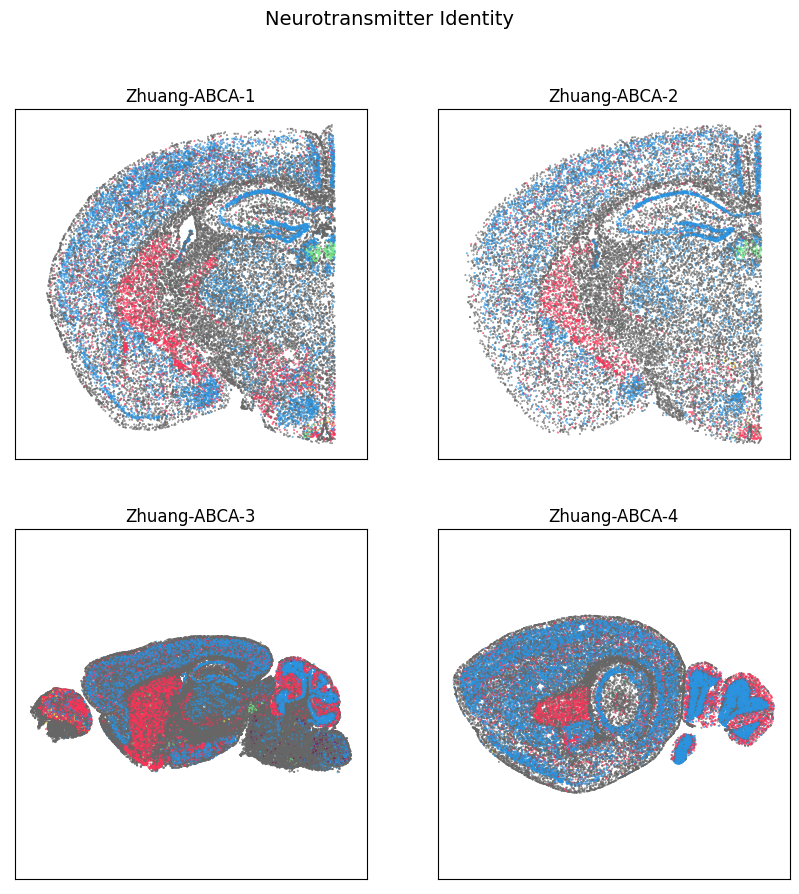

In [32]:
fig, ax = plot_sections(cell_extended, example_section, 'neurotransmitter_color')
res = fig.suptitle('Neurotransmitter Identity', fontsize=14)

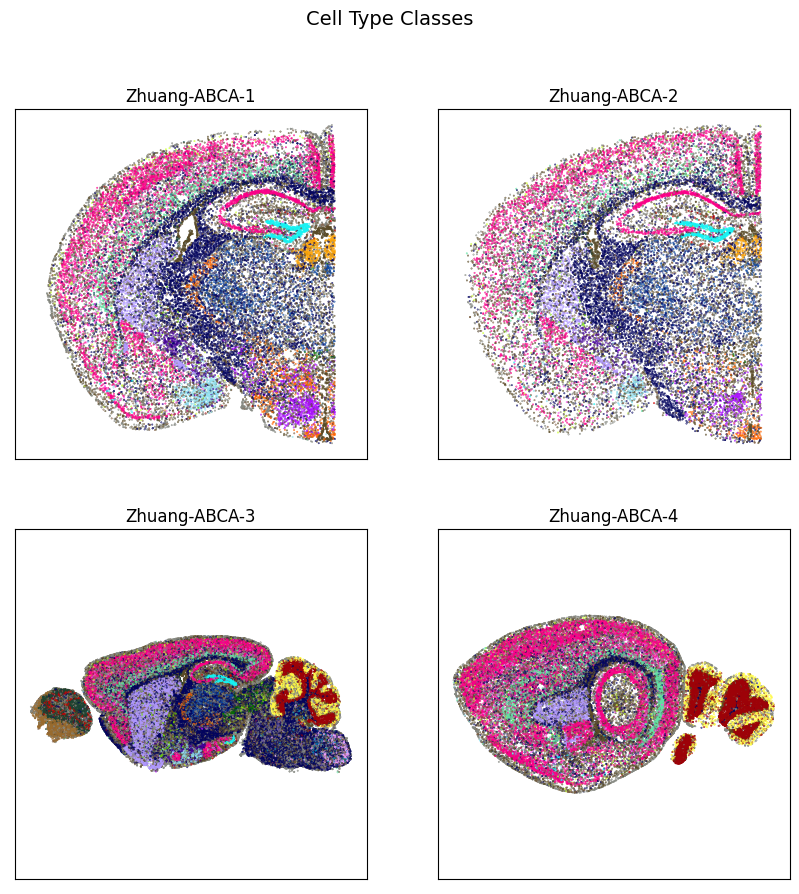

In [33]:
fig, ax = plot_sections(cell_extended, example_section, 'class_color')
res = fig.suptitle('Cell Type Classes', fontsize=14)

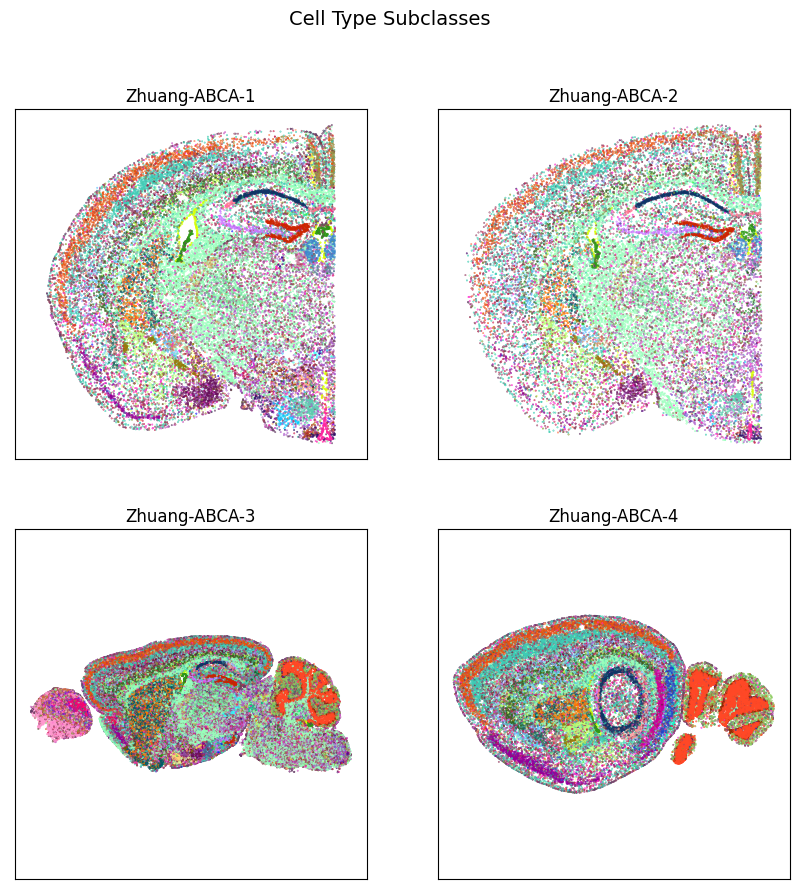

In [34]:
fig, ax = plot_sections(cell_extended, example_section, 'subclass_color')
res = fig.suptitle('Cell Type Subclasses', fontsize=14)

In [35]:
ccf_coordinates = {}

for d in datasets :

    ccf_coordinates[d] = abc_cache.get_metadata_dataframe(directory=f"{d}-CCF", file_name='ccf_coordinates')
    ccf_coordinates[d].set_index('cell_label', inplace=True)
    ccf_coordinates[d].rename(columns={'x': 'x_ccf',
                                       'y': 'y_ccf',
                                       'z': 'z_ccf'},
                              inplace=True)
    
    cell_extended[d] = cell_extended[d].join(ccf_coordinates[d], how='inner')

In [36]:
ccf_coordinates[datasets[0]]

,x_ccf,y_ccf,z_ccf,parcellation_index
cell_label,,,,
182941331246012878296807398333956011710,7.902190,3.048426,0.582962,0
221260934538535633595532020856387724686,7.906513,3.145200,0.577602,0
22228792606814781533240955623030943708,7.906110,3.182761,0.553731,0
272043042552227961220474294517855477150,7.904627,3.131808,0.563525,0
110116287883089187971185374239350249328,7.907236,3.230647,0.543048,0
...,...,...,...,...
94310525370042131911495836073267655162,9.681244,4.453979,0.852027,0
298798481479578578007190103666214714353,9.676999,4.291647,0.899531,1109
330756942354980576352210203729462562749,9.678760,4.363282,0.894082,1109


In [37]:
parcellation_annotation = abc_cache.get_metadata_dataframe(directory="Allen-CCF-2020",
                                                           file_name='parcellation_to_parcellation_term_membership_acronym')
parcellation_annotation.set_index('parcellation_index', inplace=True)
parcellation_annotation.columns = ['parcellation_%s'% x for x in  parcellation_annotation.columns]

parcellation_color = abc_cache.get_metadata_dataframe(directory="Allen-CCF-2020",
                                                      file_name='parcellation_to_parcellation_term_membership_color')
parcellation_color.set_index('parcellation_index', inplace=True)
parcellation_color.columns = ['parcellation_%s'% x for x in  parcellation_color.columns]

parcellation_to_parcellation_term_membership_acronym.csv: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 22.3k/22.3k [00:00<00:00, 229kMB/s]
parcellation_to_parcellation_term_membership_color.csv: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30.5k/30.5k [00:00<00:00, 398kMB/s]


In [39]:
for d in datasets :
    cell_extended[d] = cell_extended[d].join(parcellation_annotation, on='parcellation_index')
    cell_extended[d] = cell_extended[d].join(parcellation_color, on='parcellation_index')   

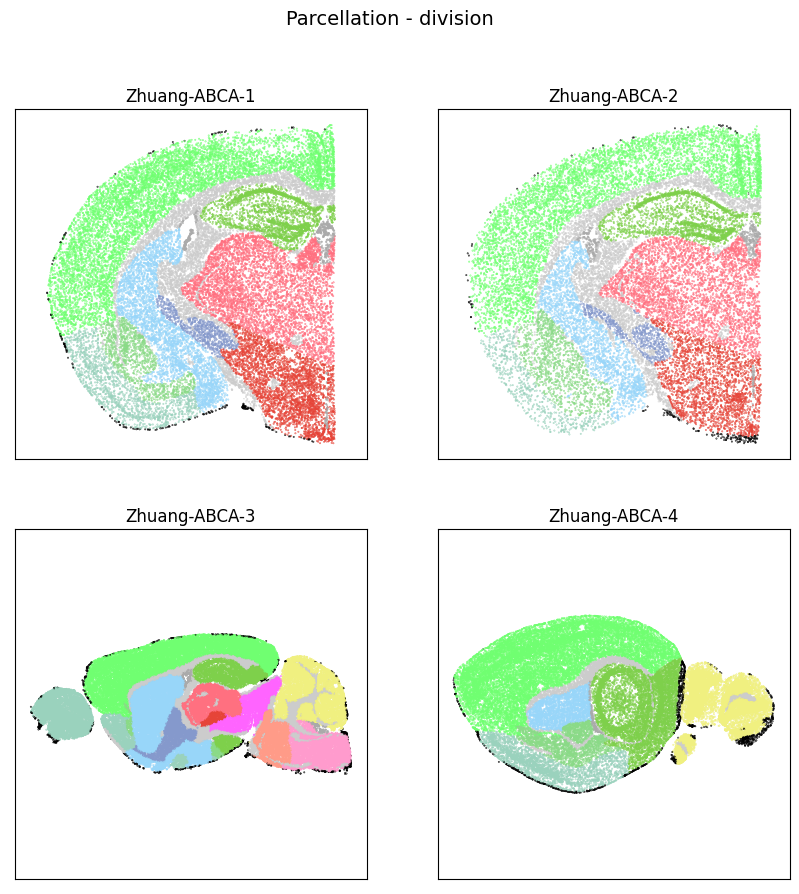

In [40]:
fig, ax = plot_sections(cell_extended, example_section, 'parcellation_division_color')
res = fig.suptitle('Parcellation - division', fontsize=14)